# Prediction of Stock Price using Kares

## Load libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis
from dsx_ml.ml import save

In [4]:
import os, pandas as pd
# Add asset from file system
Price = pd.read_csv(os.environ['DSX_PROJECT_DIR']+'/datasets/prices 2.csv')
Price.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


## Select the company and closing price

In [5]:
Target = 'IBM'
ibm = Price[Price['symbol'] == Target]
ibm_stock_prices = ibm.close.values.astype('float32')
ibm_stock_prices.shape
ibm_stock_prices = ibm_stock_prices.reshape(ibm_stock_prices.shape[0],1)

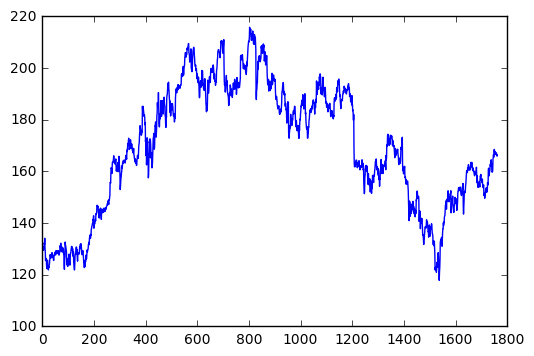

In [6]:
# Visualization
plt.plot(ibm_stock_prices)
plt.show()

## Split the data into train and test 

In [7]:
train_size = int(len(ibm_stock_prices)*0.8)
test_size = len(ibm_stock_prices) - train_size
train, test = ibm_stock_prices[0:train_size,:], ibm_stock_prices[train_size:,:]

### Convert the data into a data frame - using the historical data to predict 

In [8]:
def to_frame(data, hist_point): 
    trainset = []
    for i in range(hist_point,len(data)):
        onerow = train[(i-hist_point):i+1]
        trainset.append(onerow)
    return np.array(trainset)

In [9]:
n = 5
trainset, testset = to_frame(train, n), to_frame(test, n)
trainset = trainset.reshape(len(trainset),n+1)
testset = testset.reshape(len(testset),n+1)
pd.DataFrame(trainset).head()

,0,1,2,3,4,5
0,132.449997,130.850006,130.000000,129.550003,130.850006,129.479996
1,130.850006,130.000000,129.550003,130.850006,129.479996,130.509995
2,130.000000,129.550003,130.850006,129.479996,130.509995,130.229996
3,129.550003,130.850006,129.479996,130.509995,130.229996,132.309998
4,130.850006,129.479996,130.509995,130.229996,132.309998,131.779999


In [10]:
hist_point = 10
train[(10-hist_point):10]
len(trainset[:, -1])

1404

In [11]:
l = list(range(1,n+1))
l.append("Y")

## Build some Kares models 

In [12]:
trainX = trainset[:,:n]
trainY = trainset[:, -1]
testX = testset[:,:n]
testY = testset[:, -1]

In [20]:
model = Sequential()
model.add(Dense(4, input_shape = (n,)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit(trainX,trainY,batch_size=10,nb_epoch=10,validation_split=0.1)

Train on 1263 samples, validate on 141 samples
Epoch 1/10
1263/1263 [==============================] - 0s 274us/step - loss: 3429.6489 - val_loss: 8.5406
Epoch 2/10
1263/1263 [==============================] - 0s 179us/step - loss: 6.8907 - val_loss: 6.0755
Epoch 3/10
1263/1263 [==============================] - 0s 175us/step - loss: 6.7377 - val_loss: 6.0830

In [ ]:
save(name='StockPrice',
     model=model,
     x_test=pd.DataFrame(testX),
     y_test=pd.DataFrame(testY),
     algorithm_type='Regression',
     description='This is a sample description for a keras model')

In [14]:
model = Sequential()
model.add(Dense(100, input_shape = (n,)))
model.add(Dense(10))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit(trainX,trainY,batch_size=10,nb_epoch=10,validation_split=0.1)

/opt/conda/lib/python3.5/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1263 samples, validate on 141 samples
Epoch 1/10
1263/1263 [==============================] - 0s 319us/step - loss: 799.4245 - val_loss: 8.4677
Epoch 2/10
1263/1263 [==============================] - 0s 212us/step - loss: 13.0934 - val_loss: 8.7598
Epoch 3/10
1263/1263 [==============================] - 0s 205us/step - loss: 13.2490 - val_loss: 7.

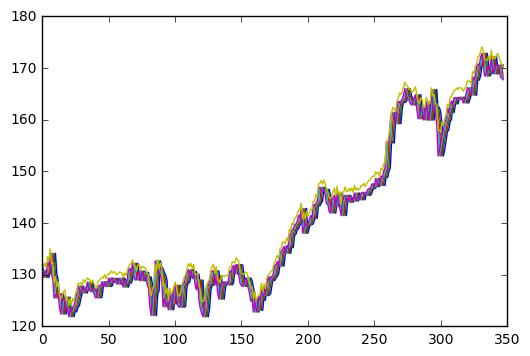

In [34]:
plt.cla()
testPredict = model.predict(testX)
plt.plot(testX)
plt.plot(testPredict)
plt.show()

## Save the model in ML repository

In [19]:
save(name='StockPrice',
     model=model,
     x_test=pd.DataFrame(testX),
     y_test=pd.DataFrame(testY),
     algorithm_type='Regression',
     description='This is a sample description for a keras model')

{'path': '/user-home/999/DSX_Projects/StockPre/models/StockPre/1',
 'scoring_endpoint': 'https://dsxl-api.ibm-private-cloud.svc.cluster.local/v3/project/score/Python35/keras-2.1/StockPre/StockPre/1'}

## The End of the project 

Created by **Rui Fan**
<br/>
rui.fan@ibm.com
<br/>
May 7, 2018